In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
from glob import glob

Buildings with ages

In [24]:
buildings = gpd.read_parquet("/data/uscuni-ulce/extension/spain/clean_3035.parquet")
buildings

,beginning,end,currentUse,floor_area,geometry
0,1944-01-01T00:00:00,1944-01-01T00:00:00,4_3_publicServices,55,"POLYGON ((3328786.428 2102374.993, 3328777.707..."
1,1944-01-01T00:00:00,1944-01-01T00:00:00,3_industrial,76,"POLYGON ((3328723.849 2101563.942, 3328724.862..."
2,1900-01-01T00:00:00,2000-01-01T00:00:00,4_3_publicServices,119,"POLYGON ((3324585.802 2104952.066, 3324588.398..."
3,2000-01-01T00:00:00,2000-01-01T00:00:00,2_agriculture,1047,"POLYGON ((3325928.207 2102926.23, 3325920.92 2..."
3,2000-01-01T00:00:00,2000-01-01T00:00:00,2_agriculture,1047,"POLYGON ((3326027.383 2102950.242, 3326036.09 ..."
...,...,...,...,...,...
12474033,1943-01-01T00:00:00,2000-01-01T00:00:00,1_residential,588,"POLYGON ((3325293.988 2132331.395, 3325291.564..."
12474034,1943-01-01T00:00:00,1943-01-01T00:00:00,3_industrial,612,"POLYGON ((3325301.591 2132309.053, 3325303.907..."
12474035,1943-01-01T00:00:00,1943-01-01T00:00:00,1_residential,198,"POLYGON ((3325315.231 2132297.456, 3325321.111..."
12474036,1943-01-01T00:00:00,2003-01-01T00:00:00,1_residential,414,"POLYGON ((3325329.104 2132292.959, 3325328.34 ..."


In [25]:
buildings.dtypes

beginning       object
end             object
currentUse      object
floor_area       int32
geometry      geometry
dtype: object

In [26]:
buildings['beginning'] = pd.to_datetime(buildings['beginning'],errors='coerce', utc=True)
buildings

,beginning,end,currentUse,floor_area,geometry
0,1944-01-01 00:00:00+00:00,1944-01-01T00:00:00,4_3_publicServices,55,"POLYGON ((3328786.428 2102374.993, 3328777.707..."
1,1944-01-01 00:00:00+00:00,1944-01-01T00:00:00,3_industrial,76,"POLYGON ((3328723.849 2101563.942, 3328724.862..."
2,1900-01-01 00:00:00+00:00,2000-01-01T00:00:00,4_3_publicServices,119,"POLYGON ((3324585.802 2104952.066, 3324588.398..."
3,2000-01-01 00:00:00+00:00,2000-01-01T00:00:00,2_agriculture,1047,"POLYGON ((3325928.207 2102926.23, 3325920.92 2..."
3,2000-01-01 00:00:00+00:00,2000-01-01T00:00:00,2_agriculture,1047,"POLYGON ((3326027.383 2102950.242, 3326036.09 ..."
...,...,...,...,...,...
12474033,1943-01-01 00:00:00+00:00,2000-01-01T00:00:00,1_residential,588,"POLYGON ((3325293.988 2132331.395, 3325291.564..."
12474034,1943-01-01 00:00:00+00:00,1943-01-01T00:00:00,3_industrial,612,"POLYGON ((3325301.591 2132309.053, 3325303.907..."
12474035,1943-01-01 00:00:00+00:00,1943-01-01T00:00:00,1_residential,198,"POLYGON ((3325315.231 2132297.456, 3325321.111..."
12474036,1943-01-01 00:00:00+00:00,2003-01-01T00:00:00,1_residential,414,"POLYGON ((3325329.104 2132292.959, 3325328.34 ..."


In [27]:
buildings["year"] = buildings["beginning"].dt.year

In [39]:
buildings = buildings[buildings["year"]<2026]

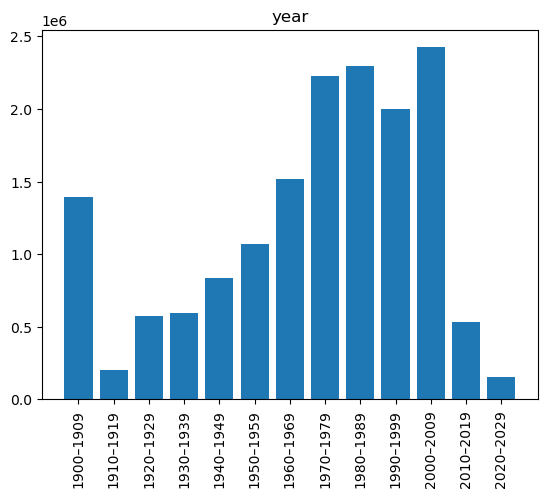

In [37]:
bins = list(range(1900, 2040, 10))
bin_centers = [(bins[i] + bins[i+1]) // 2 for i in range(len(bins)-1)]
bin_labels = [f'{bins[i]}–{bins[i+1]-1}' for i in range(len(bins)-1)]
buildings.hist(column="year",bins=bins, rwidth=0.8)
plt.xticks(bin_centers, bin_labels, rotation=90)
plt.grid(False)

Morphotopes.

In [38]:
files_morph = glob(f"/data/uscuni-ulce/data_product/extension_1/es*_morphotopes.parquet")
morphotopes_list = []
for f in files_morph:
    data = gpd.read_parquet(f)
    morphotopes_list.append(data)

In [40]:
morphotopes = pd.concat(morphotopes_list).set_index("morphotope_id")

In [41]:
gdf = gpd.GeoDataFrame(buildings[['year','geometry']])
gdf = gdf.set_geometry(gdf.geometry.centroid)

In [42]:
gdf.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

In [56]:
morphotopes[morphotopes["initially_noise"]==False]

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label
morphotope_id,,,,,,,,,
154261_8_36,"MULTIPOLYGON (((1789241.062 949382.272, 178924...",False,1,2,4,6,9,19,39
154261_8_15,"MULTIPOLYGON (((1791357.734 950171.017, 179134...",False,1,2,5,8,12,24,49
154261_8_43,"MULTIPOLYGON (((1790727.323 950061.979, 179071...",False,1,2,4,6,9,19,39
154261_8_44,"MULTIPOLYGON (((1790282.906 949980.539, 179028...",False,1,2,5,8,12,23,47
154261_8_12,"MULTIPOLYGON (((1790098.677 950107.553, 179009...",False,2,4,7,12,18,40,75
...,...,...,...,...,...,...,...,...,...
203563_3386_0,"MULTIPOLYGON (((3187951.949 2296756.088, 31879...",False,2,4,8,17,25,56,107
203563_3354_0,"MULTIPOLYGON (((3191244.215 2295952.134, 31912...",False,1,2,5,8,13,29,60
203563_3381_0,"MULTIPOLYGON (((3185087.668 2292981.736, 31850...",False,2,4,7,13,20,47,87


Join buidings to morphtopes

In [44]:
joined_morphotopes = gdf.sjoin(morphotopes[["geometry"]], predicate="within")
joined_morphotopes

,year,geometry,morphotope_id
0,1944.0,POINT (3328783.445 2102380.608),235505_0_1
1,1944.0,POINT (3328720.335 2101560.85),235505_0_1
2,1900.0,POINT (3324591.276 2104947.51),235505_1_-1
3,2000.0,POINT (3325948.291 2102949.635),235505_2_-2
3,2000.0,POINT (3326029.672 2102943.904),235505_2_-2
...,...,...,...
12474033,1943.0,POINT (3325287.851 2132333.496),235505_17556_-17575
12474034,1943.0,POINT (3325308.984 2132307.885),235505_17556_-17575
12474035,1943.0,POINT (3325320.134 2132292.158),235505_17556_-17575
12474036,1943.0,POINT (3325333.525 2132290.229),235505_17556_-17575


Group buildings per morphotope

In [48]:
bins = list(range(1000,2040,10))
def mode_bin(x):
    binned = pd.cut(x, bins=bins, right=True)
    m = binned.mode()
    return m.iloc[0] if not m.empty else None

In [49]:
grouped = joined_morphotopes.groupby("morphotope_id")

In [50]:
grouped_stats = grouped.agg(
    num_buildings=('year', 'count'),  # <-- total number of buildings (rows)

    year_mean=('year', 'mean'),
    year_median=('year', 'median'),
    year_min=('year', 'min'),
    year_q10=('year', lambda x: x.quantile(0.1)),
    year_q90=('year', lambda x: x.quantile(0.9)),
    year_max=('year', 'max'),
    year_std=('year', 'std'),
    year_mode=('year', mode_bin)
).round(2)
grouped_stats

,num_buildings,year_mean,year_median,year_min,year_q10,year_q90,year_max,year_std,year_mode
morphotope_id,,,,,,,,,
153563_0_0,218,1971.92,1980.0,1890.0,1900.0,2002.0,2020.0,34.55,"(1990, 2000]"
153563_0_1,181,1951.79,1980.0,1730.0,1780.0,2005.0,2022.0,76.63,"(1990, 2000]"
153563_0_2,87,1964.34,1980.0,1900.0,1900.0,2002.4,2012.0,39.47,"(1890, 1900]"
153563_0_3,97,1965.40,1975.0,1900.0,1900.0,2004.0,2009.0,38.37,"(1890, 1900]"
153563_0_4,97,1948.23,1998.0,1730.0,1760.0,2008.0,2022.0,90.35,"(2000, 2010]"
...,...,...,...,...,...,...,...,...,...
450310_97_-96,3,1968.67,2005.0,1896.0,1917.8,2005.0,2005.0,62.93,"(2000, 2010]"
450310_98_-97,3,1955.00,1989.0,1887.0,1907.4,1989.0,1989.0,58.89,"(1980, 1990]"
450310_99_0,104,1964.33,1970.0,1900.0,1940.0,1989.0,2019.0,25.04,"(1970, 1980]"


In [51]:
morphotopes_age = morphotopes.join(grouped_stats, how='inner')
morphotopes_age

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,year_mean,year_median,year_min,year_q10,year_q90,year_max,year_std,year_mode
morphotope_id,,,,,,,,,,,,,,,,,,
154261_8_36,"MULTIPOLYGON (((1789241.062 949382.272, 178924...",False,1,2,4,6,9,19,39,195,1988.63,1997.0,1900.0,1967.4,2004.0,2004.0,17.66,"(2000, 2010]"
154261_8_15,"MULTIPOLYGON (((1791357.734 950171.017, 179134...",False,1,2,5,8,12,24,49,337,1987.87,1987.0,1968.0,1986.0,1995.0,2002.0,3.74,"(1980, 1990]"
154261_8_43,"MULTIPOLYGON (((1790727.323 950061.979, 179071...",False,1,2,4,6,9,19,39,117,1987.74,1987.0,1968.0,1984.2,1995.0,2019.0,6.92,"(1980, 1990]"
154261_8_-58,"MULTIPOLYGON (((1789917.534 950504.177, 178991...",True,1,1,2,3,5,9,16,70,1991.13,1989.0,1950.0,1988.0,2004.0,2004.0,7.28,"(1980, 1990]"
154261_8_44,"MULTIPOLYGON (((1790282.906 949980.539, 179028...",False,1,2,5,8,12,23,47,88,1988.93,1989.0,1978.0,1980.0,1996.0,1999.0,6.20,"(1980, 1990]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203563_3439_-3453,"MULTIPOLYGON (((3183034.675 2290734.509, 31830...",True,1,2,4,5,8,17,35,5,2010.00,2010.0,2010.0,2010.0,2010.0,2010.0,0.00,"(2000, 2010]"
203563_3435_-3449,"MULTIPOLYGON (((3182390.057 2291514.063, 31823...",True,1,2,4,5,8,17,35,1,1995.00,1995.0,1995.0,1995.0,1995.0,1995.0,NaN,"(1990, 2000]"
203563_3451_-3465,"MULTIPOLYGON (((3183883.707 2291221.49, 318388...",True,1,2,3,4,6,12,24,1,2008.00,2008.0,2008.0,2008.0,2008.0,2008.0,NaN,"(2000, 2010]"


In [52]:
morphotopes_age = morphotopes_age[
    (morphotopes_age['num_buildings'] != 0) &
    (morphotopes_age['initially_noise'] == False)
]

In [53]:
morphometrics = pd.read_parquet("/data/uscuni-ulce/data_product/extension_1/morphotope_data_fr_sp_nl_be.parquet")

In [54]:
joined = morphotopes_age.join(morphometrics,how='left')
joined

,geometry,initially_noise,level_1_label,level_2_label,level_3_label,level_4_label,level_5_label,level_6_label,level_7_label,num_buildings,...,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
morphotope_id,,,,,,,,,,,,,,,,,,,,,
154261_8_36,"MULTIPOLYGON (((1789241.062 949382.272, 178924...",False,1,2,4,6,9,19,39,195,...,0.759629,0.914997,0.539197,20.036945,2.971040,2.971040,1605.328009,397.015570,1.0,127882.778479
154261_8_15,"MULTIPOLYGON (((1791357.734 950171.017, 179134...",False,1,2,5,8,12,24,49,337,...,0.590045,0.889519,0.516493,15.857084,2.232566,2.232566,65.587205,86.590409,1.0,4916.183878
154261_8_43,"MULTIPOLYGON (((1790727.323 950061.979, 179071...",False,1,2,4,6,9,19,39,117,...,0.762957,0.769257,0.519012,21.063154,2.505593,2.505593,122.162041,164.151911,1.0,7038.301487
154261_8_44,"MULTIPOLYGON (((1790282.906 949980.539, 179028...",False,1,2,5,8,12,23,47,88,...,0.777555,0.914812,0.576181,19.852994,3.199170,3.199170,239.851597,105.721956,1.0,11586.979732
154261_8_12,"MULTIPOLYGON (((1790098.677 950107.553, 179009...",False,2,4,7,12,18,40,75,139,...,0.745158,0.731604,0.633084,19.051113,2.523666,2.523666,62.511889,475.682975,1.0,2467.937565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203563_3386_0,"MULTIPOLYGON (((3187951.949 2296756.088, 31879...",False,2,4,8,17,25,56,107,122,...,0.426940,0.873167,0.396421,37.267361,4.245372,4.245372,82.796284,66.890818,1.0,16195.180303
203563_3354_0,"MULTIPOLYGON (((3191244.215 2295952.134, 31912...",False,1,2,5,8,13,29,60,80,...,0.659152,0.820535,0.438996,27.924375,3.423645,3.423645,104.125130,85.447676,1.0,7156.151167
203563_3381_0,"MULTIPOLYGON (((3185087.668 2292981.736, 31850...",False,2,4,7,13,20,47,87,87,...,0.649014,0.733694,0.409142,34.758868,3.526355,3.526355,64.184792,71.947088,1.0,5635.600224


In [57]:
joined.to_parquet("/data/uscuni-evolution/all_joined_es.parquet")